In [17]:
%load_ext autoreload
%autoreload 2
import numpy as np
import networkx as nx
import logging, sys
import cstrees.scoring as sc
import cstrees.cstree as ct
import matplotlib.pyplot as plt
#logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)
logging.basicConfig(stream=sys.stderr, level=logging.ERROR)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


      a  b  c
0     2  2  2
1     1  0  0
2     1  1  1
3     1  1  1
4     1  1  0
...  .. .. ..
1996  1  1  0
1997  1  1  1
1998  1  1  1
1999  1  1  1
2000  1  1  0

[2001 rows x 3 columns]


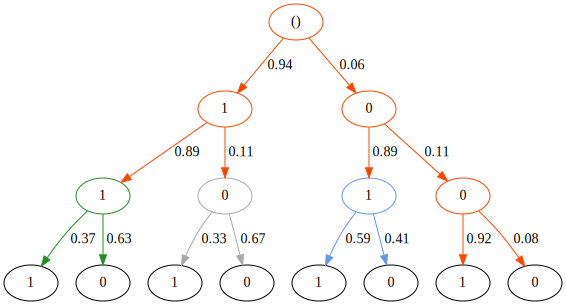

In [20]:
np.random.seed(5)
p = 3
cards = [2] * p
tree = ct.CStree(cards)
tree.labels = ["a", "b", "c"]

# V-structure
tree.update_stages({
   0: [ct.Stage([{0, 1}])],
   1: [ct.Stage([0,0]), ct.Stage([0,1]), ct.Stage([1,0]), ct.Stage([1,1])]})

# Fork
#tree.update_stages({
#    #0: [ct.Stage([0]),ct.Stage([1])],
#    0: [ct.Stage([{0, 1}])],
#    1: [ct.Stage([{0,1},0]), ct.Stage([{0,1},1])]})


tree.set_random_stage_parameters()
tree.create_tree()
tree.set_random_parameters()
a = tree.plot()

# a.draw("testplot.png")
x = tree.sample(2000)
print(x)
a

true_cdags = tree.to_minimal_context_graphs()
for key, val in true_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_true.png",
                args='-Glabel="'+str(key)+'"   ')
a


In [21]:

order = ["a", "b", "c"]
# Should order be expressed as the labels or as the levels?
# labels seems more natural but may include strings then which is a bit ugly.
s1 = sc.score_order(order, x, max_cvars=2, alpha_tot=1.0, method="BDeu")
print(s1)

-2436.4242146719926


In [22]:
#order = [0, 2, 1]
order = ["a", "c", "b"]
s2 = sc.score_order(order, x, max_cvars=2, alpha_tot=1.0, method="BDeu")
print(s2)

-2439.523527967844


order: ['a', 'b', 'c'], score: -2436.4242146719926
order: ['a', 'c', 'b'], score: -2439.523527967844
order: ['b', 'a', 'c'], score: -2436.4242146719926
order: ['b', 'c', 'a'], score: -2437.5834782289157
order: ['c', 'a', 'b'], score: -2439.5235279678436
order: ['c', 'b', 'a'], score: -2437.5834782289157
optimal order: ['a', 'b', 'c'], score -2436.4242146719926
max staging: []
max staging: ['[{0, 1}]']
max staging: ['[1, {0, 1}]', '[0, 0]', '[0, 1]']
stages :{0: [<cstrees.cstree.Stage object at 0x7fa15a154df0>], 1: [<cstrees.cstree.Stage object at 0x7fa15a0e8df0>, <cstrees.cstree.Stage object at 0x7fa15a0e8400>, <cstrees.cstree.Stage object at 0x7fa15a0e85b0>], 2: [], -1: [<cstrees.cstree.Stage object at 0x7fa15a042dc0>]}


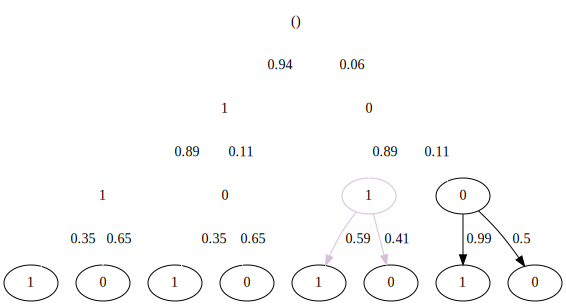

In [23]:
optord, score = ct.find_optimal_order(x, strategy="max", max_cvars=2, alpha_tot=1.0, method="BDeu")
print("optimal order: {}, score {}".format(optord, score))

opttree = ct.optimal_cstree(optord, x, max_cvars=2, alpha_tot=1.0, method="BDeu")
print("stages :{}".format(opttree.stages))
opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.create_tree()
opttree.set_random_parameters()
opttree.plot()

In [24]:
opt_cdags = opttree.to_minimal_context_graphs()
for key, val in opt_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_opt.png",
                args='-Glabel="'+str(key)+'"   ')